In [1]:
import requests

REST_API_KEY = '2fa4da0b370eee3234c565b78ecff325'
# url 의 ? 뒤쪽은 쿼리 파라미터
# keyword의 주변 반경 1km 내의 맛집 찾기
KEYWORD_LOCAL_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=1000'

keywords=['서울역', '홍대입구역']

In [2]:
# header 에 인증 정보 추가 (안하면 401 error)
headers = {
    'Authorization' : f'KakaoAK {REST_API_KEY}'
}
response = requests.get(KEYWORD_LOCAL_URL.format(keywords[0] + '맛집'), headers=headers)
response

<Response [200]>

In [3]:
import time
all_data=[]
# 나머지 페이지 및 키워드에 대한 데이터를 가져오기
for keyword in keywords:
    for page in range(1, 6):  # 1페이지부터 5페이지까지 반복
        # 첫 번째 키워드의 첫 페이지는 이미 요청되었으므로 건너뜁니다.
        if keyword == keywords[0] and page == 1:
            continue
        params = {
            'page': page,
            'size': 15  # 페이지당 결과 수
        }
        response = requests.get(KEYWORD_LOCAL_URL.format(keyword + ' 맛집'), headers=headers, params=params)
        if response.status_code == 200:
            data = response.json().get('documents', [])
            if not data:  # 더 이상 데이터가 없으면 중지
                break
            all_data.extend(data)  # 데이터를 리스트에 추가
        else:
            print(f"Error fetching data for {keyword} page {page}: {response.status_code}")
            break
        time.sleep(2)  # 웹 페이지 로드를 보장하기 위해 2초 쉬기
# 수집된 모든 데이터를 출력
for place in all_data:
    print({
        'address_name': place['address_name'],
        'category_group_code': place.get('category_group_code', ''),
        'category_group_name': place.get('category_group_name', ''),
        'category_name': place['category_name'],
        'distance': place.get('distance', ''),
        'id': place['id'],
        'phone': place['phone'],
        'place_name': place['place_name'],
        'place_url': place['place_url'],
        'road_address_name': place['road_address_name'],
        'x': place['x'],
        'y': place['y']
    })

{'address_name': '서울 중구 남대문로5가 84-11', 'category_group_code': 'FD6', 'category_group_name': '음식점', 'category_name': '음식점 > 일식 > 초밥,롤', 'distance': '', 'id': '21398341', 'phone': '02-2259-0088', 'place_name': '해랑스시', 'place_url': 'http://place.map.kakao.com/21398341', 'road_address_name': '서울 중구 통일로 10', 'x': '126.973544041677', 'y': '37.5570149191751'}
{'address_name': '서울 중구 봉래동2가 122-11', 'category_group_code': 'FD6', 'category_group_name': '음식점', 'category_name': '음식점 > 양식 > 햄버거', 'distance': '', 'id': '614833390', 'phone': '', 'place_name': '파이브가이즈 서울역점', 'place_url': 'http://place.map.kakao.com/614833390', 'road_address_name': '서울 중구 한강대로 405', 'x': '126.970224215103', 'y': '37.5551319448191'}
{'address_name': '서울 중구 남창동 47-10', 'category_group_code': 'FD6', 'category_group_name': '음식점', 'category_name': '음식점 > 한식 > 냉면', 'distance': '', 'id': '7914330', 'phone': '02-753-7728', 'place_name': '부원면옥', 'place_url': 'http://place.map.kakao.com/7914330', 'road_address_name': '서울 중구 남대문시

In [4]:
len(all_data)

135

## comment 수집하기

In [5]:
# 각 가게에 부여된 id와 마지막 comment id 를 넣을 수 있게 format 삽입
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false"

In [6]:
# 가게 id 추출
ids = [d['id'] for d in all_data]
ids

['21398341',
 '614833390',
 '7914330',
 '401292599',
 '26644530',
 '1462731560',
 '1255299690',
 '16039548',
 '27244728',
 '11152625',
 '21445943',
 '1102847581',
 '302317049',
 '8081393',
 '1644608542',
 '10335617',
 '2092235998',
 '450580125',
 '12077369',
 '26596136',
 '9963594',
 '8670706',
 '986888165',
 '67078466',
 '1711121947',
 '13582387',
 '1398440352',
 '10346282',
 '954522598',
 '34995480',
 '10335617',
 '2092235998',
 '450580125',
 '12077369',
 '26596136',
 '9963594',
 '8670706',
 '986888165',
 '67078466',
 '1711121947',
 '13582387',
 '1398440352',
 '10346282',
 '954522598',
 '34995480',
 '10335617',
 '2092235998',
 '450580125',
 '12077369',
 '26596136',
 '9963594',
 '8670706',
 '986888165',
 '67078466',
 '1711121947',
 '13582387',
 '1398440352',
 '10346282',
 '954522598',
 '34995480',
 '1622865435',
 '8123221',
 '53292857',
 '27272711',
 '1797970569',
 '1767349854',
 '965893653',
 '13337463',
 '443293859',
 '18514677',
 '19382069',
 '21089840',
 '12771116',
 '9012776',
 '

In [7]:
len(ids)

135

In [ ]:
all_comments = []
for id in ids:
    # 첫 번쨰 코멘트의 id는 무조건 0
    comment_id = 0

    # has_next가 true 면 마지막 코멘트 id를 새롭게 넣어 계속 크롤링
    has_next = True

    while has_next:
        # 수집해야 할 url 설정
        SCRAP_COMMENT_URL = COMMENT_URL.format(id, comment_id)
        # 만들어진 url로 요청
        response = requests.get(SCRAP_COMMENT_URL)
        comment_data = response.json()['comment']
        # 댓글 데이터 가져오기
        comment_list = comment_data['list']
        all_comments.extend(comment_list) # 1차원 배열로 쭉 이어붙이기
        # 다음 페이지 존재 여부 확인
        has_next = comment_data['hasNext']
        # has_next 가 True 인 경우 마지막 코멘트의 id를 comment_id로 설정
        if has_next:
            comment_id = comment_list[-1]['commentid']

        print(comment_list)

all_comments

In [9]:
len(all_comments)

3052

In [10]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df_filtered = comment_df[['contents', 'point']]
comment_df_filtered

contents  point
0           다 알바임?\n\n밥은 말랐고 회는 ..\n\n하.. \n\n오랜만이네 1점.      1
1     세번 방문했는데 갈 때마다 만족했습니다. 바쁘고 정신 없을텐데도 사장님분들 넘 친절...      5
2                                   친절하신데ㅜ 초밥 맛은 그냥...       3
3     가장 먹을만한게 활어라 활어를 3-4번 시켜먹었는데 그만 먹길 바라셨는지.. 제가 ...      2
4                            가성비 좋고, 사장님도 너무 친절하셨어요👍🏻👍🏻      4
...                                                 ...    ...
3047                                                NaN      3
3048                                             적당히맛잇음      4
3049                                                NaN      4
3050                                 여긴 인생 중국 맛집임. 확실함.      5
3051                                                NaN      3

[3052 rows x 2 columns]

<Axes: xlabel='point'>

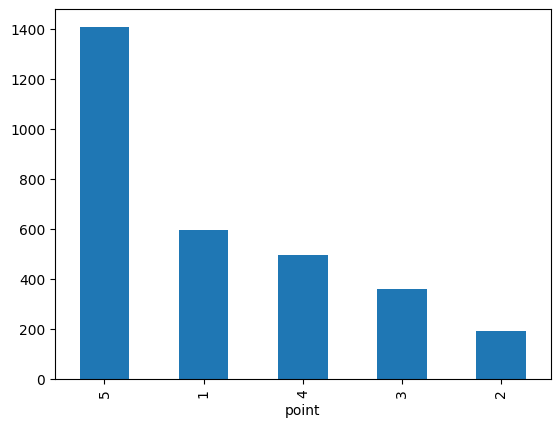

In [11]:
comment_df_filtered['point'].value_counts().plot(kind='bar')

In [60]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------- 250.9/250.9 kB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
comment_df_filtered.to_excel('comments_seoul.xlsx', index=False)